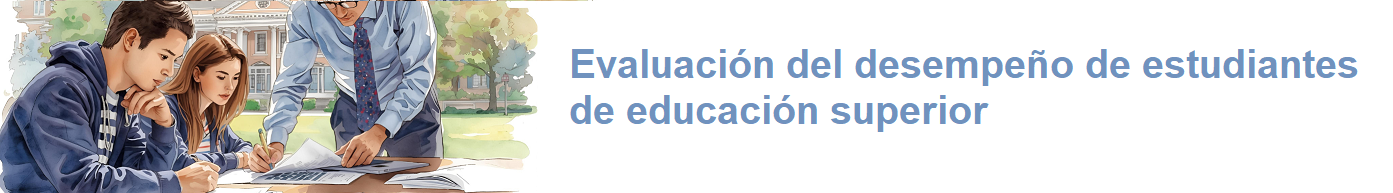

# **1- Comprensión del negocio**

---


El presente trabajo corresponde a la segunda entrega del proyecto de Ciencia de Datos I. Las etapas que se desarrollan en este trabajo se realizan con el dataset Higher Education Students Performance Evaluation (UCI Machine Learning Repository). La información que brinda el conjunto de datos están relacionadas con características personales, familiares, hábitos de estudio y desempeño académico de estudiantes de nivel superior.

**Primera entrega**

El objetivo preliminar fue formular preguntas de investigación, plantear hipótesis y realizar un análisis exploratorio mediante resúmenes numéricos y visualizaciones, a fin de identificar patrones y relaciones entre las variables y el rendimiento académico final.



# 2- Consigna del Proyecto Final

---

Crear un notebook que complemente el trabajo realizado en los siguientes apartados:

i) Elegir un método de feature selection para reducir la dimensionalidad del dataset.

ii) Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.

iii) Cálculo de métricas básicas para validar el modelo.

iv) Generar conclusiones con base en los resultados obtenidos.


**Aspectos a incluir**

El código debe estar hecho en un notebook y debe estar probado.

Toda la entrega debe estar en su GitHub (notebook y base de datos).

**Formato**

Entregar un archivo con formato .ipynb. Debe tener el nombre “ProyectoParteII+Apellido.ipynb”



# 3- Archivo de datos a utilizar

---

Para evitar trabajar con un notebook extenso se procedio a modificar el notebook de la primera entrega y se le agregó, al final, una nueva sección  para guardar el df_modificado en formato csv. De este modo, en este trabajo, parto de ese archivo para realizar esta etapa del trabajo.


 **a) Importar librerias**


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**b) Conectar Datasets**

In [27]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/0- CH-DSCience I/ProyectoDSI -Pianucci Irma/Modificado_archivo.csv", delimiter=',')
print("Vista inicial de los datos")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Vista inicial de los datos


,STUDENT ID,Student_Age,Sex,Grad_H_school_type,Scholarship_type,Additional_work,Extra_activity,Partner,Total_salary,Transp_to_univ,...,Preparation_midterm_exams2,Taking_notes_classes,Listening_classes,Discussion_class,Flip_classroom,Cumulative_grade_semester,Expected_Cumulative_grade,COURSE ID,GRADE,GRADE_letter
0,STUDENT1,22-25,male,other,50%,1,2,No,USD 135-200,Bus,...,closest date exam,always,sometimes,never,useful,<2.00,<2.00,1,1,DD
1,STUDENT2,22-25,male,other,50%,1,2,No,USD 135-200,Bus,...,closest date exam,always,sometimes,always,useful,2.00-2.49,2.50-2.99,1,1,DD
2,STUDENT3,22-25,male,state,50%,2,2,No,USD 201-270,Other,...,closest date exam,sometimes,sometimes,never,not useful,2.00-2.49,2.00-2.49,1,1,DD
3,STUDENT4,18-21,female,private,50%,1,2,Yes,USD 201-270,Bus,...,regularly during semester,always,sometimes,sometimes,not useful,2.50-2.99,2.00-2.49,1,1,DD
4,STUDENT5,22-25,male,private,50%,2,2,Yes,USD 271-340,Bus,...,closest date exam,sometimes,sometimes,sometimes,not useful,2.00-2.49,2.00-2.49,1,1,DD


In [28]:
df.dtypes

,0
STUDENT ID,object
Student_Age,object
Sex,object
Grad_H_school_type,object
Scholarship_type,object
Additional_work,int64
Extra_activity,int64
Partner,object
Total_salary,object
Transp_to_univ,object


# 4- Selección de atributos para modelar

**Preguntas de investigación e Hipótesis iniciales**

Pregunta 1: ¿Los estudiantes que dedican más horas de estudio tienden a obtener mejores calificaciones finales?

Hipótesis: A mayor cantidad de horas de estudio, mayor probabilidad de obtener notas en las categorías superiores (BA, AA).

Pregunta 2: ¿El nivel educativo de los padres está asociado al rendimiento académico del estudiante?

Hipótesis: Los estudiantes cuyos padres tienen educación universitaria presentan un rendimiento más alto en promedio que aquellos cuyos padres tienen solo educación secundaria o menos.

Pregunta 3: ¿La asistencia a clases influye en la calificación final?

Hipótesis: Los estudiantes con asistencia regular a clases obtienen mejores calificaciones finales.

# 5- Análisis Pregunta 1
----
Analizar el dataset "student_performance_data.csv" para responder a la pregunta de investigación "¿Los estudiantes que dedican más horas de estudio tienden a obtener mejores calificaciones finales?", aplicando feature selection y creando un modelo de clasificación o regresión.

## a- Preparación de los datos

### Subtarea:
Identificar las variables relevantes para la pregunta de investigación elegida y realizar la codificación necesaria para las variables categóricas.


**Paso 1**:
Identificar y seleccionar las columnas relevantes para la pregunta de investigación, verificar sus tipos de datos e identificar valores únicos en las columnas categóricas para prepararlas para la codificación.



In [29]:
# Identificar columnas relevantes basadas en la pregunta de investigación
relevant_columns = ['Weekly_study_hours', 'GRADE_letter', 'GRADE']

# Seleccionar las columnas relevantes
df_relevant = df[relevant_columns].copy()

# Examinar los tipos de datos de las columnas relevantes
print("Tipo de datos de las columnas relevantes:")
print(df_relevant.dtypes)

# Identificar tipos únicos en las columnas categóricas ('object' dtype)
print("\nValores únicos en columnas categóricas:")
for col in df_relevant.select_dtypes(include='object').columns:
    print(f"{col}: {df_relevant[col].unique()}")

Tipo de datos de las columnas relevantes:
Weekly_study_hours    object
GRADE_letter          object
GRADE                  int64
dtype: object

Valores únicos en columnas categóricas:
Weekly_study_hours: ['6-10 hours' '<5 hours' nan '> 20 hours' '11-20 hours']
GRADE_letter: ['DD' 'DC' 'BB' 'Fail' 'CC' 'CB' 'AA' 'BA']


## b- Selección de atributos para modelar

### Subtarea:
Aplicar un método de feature selection para reducir la dimensionalidad del dataset.

Explicación:
 La selección de atributos (feature selection) es el proceso de elegir un subconjunto de las características más relevantes (variables) de tu dataset para usarlas en la construcción del modelo.

El objetivo principal es reducir la dimensionalidad del dataset, lo cual puede ayudar a:

Mejorar la precisión del modelo: Al eliminar características irrelevantes o redundantes, se reduce el ruido y el modelo puede aprender mejor las relaciones importantes.
Reducir el tiempo de entrenamiento: Entrenar un modelo con menos características es generalmente más rápido.
Evitar el sobreajuste (overfitting): Al tener menos características, el modelo es menos propenso a ajustarse demasiado a los datos de entrenamiento y generalizar mal a datos nuevos.
Facilitar la interpretación del modelo: Un modelo con menos características es más fácil de entender y explicar.
Existen diferentes métodos de selección de atributos, que se pueden clasificar en tres categorías principales:

Métodos de filtro (Filter Methods): Estos métodos seleccionan las características basándose en su relación con la variable objetivo, utilizando métricas estadísticas (como correlación, chi-cuadrado, etc.) independientemente del algoritmo de modelado. Son computacionalmente menos costosos.
Métodos de envoltura (Wrapper Methods): Estos métodos utilizan un algoritmo de aprendizaje automático para evaluar diferentes subconjuntos de características. Entrenan un modelo con cada subconjunto y evalúan su rendimiento. Son más precisos pero computacionalmente más intensivos (ejemplos: Recursive Feature Elimination - RFE, Sequential Feature Selection).
Métodos embebidos (Embedded Methods): Estos métodos integran el proceso de selección de características dentro del propio algoritmo de aprendizaje. Algunos algoritmos de modelado tienen mecanismos incorporados para seleccionar características importantes durante el entrenamiento (ejemplos: modelos basados en árboles como Random Forest, modelos lineales con regularización L1 - Lasso).

Nota:
Para tu caso, dado que la pregunta de investigación se centra en la relación entre las horas de estudio y la calificación final, y ya has identificado esas dos variables como relevantes, podrías considerar si necesitas aplicar un método de selección de atributos adicional si tuvieras muchas más variables predictoras. Sin embargo, con solo una variable predictora (Weekly_study_hours_encoded) y una variable objetivo (GRADE_encoded), la selección de atributos ya se ha realizado al enfocarte en estas columnas específicas. Si quisieras explorar otras variables del dataset para mejorar el modelo, entonces sí aplicarías un método de selección de atributos para ver cuáles otras características podrían ser importantes.

**Paso 1**:
Con base en los valores únicos identificados, codificar la columna categórica 'Weekly_study_hours' y asignar la columna 'GRADE_letter' a una representación numérica, que es la variable objetivo.

In [30]:
# Define the mapping for 'Weekly_study_hours' - using the mapping provided earlier
study_hours_mapping = {
 'None' : 1 ,  '<5 hours' : 2,  '6-10 hours' : 3, '11-20 hours' : 4,  'more than 20 hours' : 5
}

# Apply the mapping to 'Weekly_study_hours'
# We need to handle the 'nan' values before applying the map.
# Let's fill NaN with a placeholder or the mode before mapping
# Check the current unique values including NaN to decide how to handle them
print(f"Unique values in 'Weekly_study_hours' before handling NaN: {df_relevant['Weekly_study_hours'].unique()}")

# Let's fill NaN with the mode before mapping
mode_study_hours_category = df_relevant['Weekly_study_hours'].mode()[0]
df_relevant['Weekly_study_hours_filled'] = df_relevant['Weekly_study_hours'].fillna(mode_study_hours_category)

# Now apply the mapping to the filled column
df_relevant['Weekly_study_hours_encoded'] = df_relevant['Weekly_study_hours_filled'].map(study_hours_mapping)

# Define the mapping for 'GRADE_letter' to numerical values
grade_mapping = {
    'Fail': 0, 'DD': 1, 'DC': 2, 'CC': 3, 'CB': 4, 'BB': 5, 'BA': 6, 'AA': 7
}

# Apply the mapping to 'GRADE_letter'
df_relevant['GRADE_encoded'] = df_relevant['GRADE_letter'].map(grade_mapping)

# Display the updated DataFrame with encoded columns
display(df_relevant.head())

# Check data types again to confirm encoding
print("\nData types after encoding:")
print(df_relevant.dtypes)

# Check for any remaining missing values in the encoded columns
print("\nMissing values after encoding:")
print(df_relevant[['Weekly_study_hours_encoded', 'GRADE_encoded']].isnull().sum())

Unique values in 'Weekly_study_hours' before handling NaN: ['6-10 hours' '<5 hours' nan '> 20 hours' '11-20 hours']


,Weekly_study_hours,GRADE_letter,GRADE,Weekly_study_hours_filled,Weekly_study_hours_encoded,GRADE_encoded
0,6-10 hours,DD,1,6-10 hours,3.0,1
1,<5 hours,DD,1,<5 hours,2.0,1
2,<5 hours,DD,1,<5 hours,2.0,1
3,6-10 hours,DD,1,6-10 hours,3.0,1
4,<5 hours,DD,1,<5 hours,2.0,1



Data types after encoding:
Weekly_study_hours             object
GRADE_letter                   object
GRADE                           int64
Weekly_study_hours_filled      object
Weekly_study_hours_encoded    float64
GRADE_encoded                   int64
dtype: object

Missing values after encoding:
Weekly_study_hours_encoded    4
GRADE_encoded                 0
dtype: int64


## c- División de los datos

### Subtarea:
Dividir el dataset en conjuntos de entrenamiento y prueba.

In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# X will be the encoded weekly study hours, and y will be the encoded grade
X = df_relevant[['Weekly_study_hours_encoded']]
y = df_relevant['GRADE_encoded']

# Split the data into training and testing sets
# We'll use a common split ratio, like 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (116, 1)
Shape of X_test: (29, 1)
Shape of y_train: (116,)
Shape of y_test: (29,)


## d- Entrenamiento del modelo

### Subtarea:
Entrenar un modelo de regresión lineal simple utilizando los datos de entrenamiento.
Dado que la variable objetivo es una calificación codificada numéricamente, podemos usar un modelo de regresión para predecir la calificación basada en las horas de estudio. Se aplica un modelo de regresión lineal simple.


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Create a Linear Regression model instance
model = LinearRegression()

# Create an imputer to fill missing values with the mode
# The strategy 'most_frequent' is used for the mode
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Train the model using the imputed training data
model.fit(X_train_imputed, y_train)

print("Linear Regression model trained successfully after imputing missing values.")

Linear Regression model trained successfully after imputing missing values.


Nota: Como se detectaron valores faltantes se imputaron los valores faltantes en X_train con la moda antes de entrenar el modelo de regresión lineal.

## e- Evaluación del modelo

### Subtarea:
Calcular métricas básicas para validar el modelo entrenado.


Se haran predicciones sobre el conjunto de datos de prueba (X_test) y se calcularán algunas métricas comunes para evaluar modelos de regresión.

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in the test set using the same imputer fitted on the training data
# This is important to ensure consistency in how missing values are handled
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_test_imputed = imputer.fit_transform(X_test)


# Make predictions on the imputed test set
y_pred = model.predict(X_test_imputed)

# Calculate evaluation metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE) - often easier to interpret as it's in the same units as the target
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 4.589207522563666
Root Mean Squared Error (RMSE): 2.1422435721840003
R-squared (R2) Score: 0.0016752388835892251


## f- Conclusiones

### Subtarea:
Analizar los resultados obtenidos y sacar conclusiones con base en las métricas de evaluación.

 Las métricas que se calcularon para evaluar el modelo de regresión lineal son:

Mean Squared Error (MSE): Es el promedio de los errores al cuadrado entre las predicciones del modelo (y_pred) y los valores reales (y_test). Un MSE más bajo indica que las predicciones del modelo están más cerca de los valores reales.
En este caso, un MSE de aproximadamente 4.59 significa que, en promedio, la diferencia cuadrada entre la calificación predicha y la real es 4.59.

Root Mean Squared Error (RMSE): Es la raíz cuadrada del MSE. Es útil porque está en las mismas unidades que la variable objetivo (la calificación codificada). Un RMSE de aproximadamente 2.14 significa que, en promedio, las predicciones del modelo se desvían de la calificación real en aproximadamente 2.14 unidades de la escala de calificación codificada.

R-squared (R2) Score: También conocido como coeficiente de determinación, mide la proporción de la varianza en la variable objetivo que es predecible a partir de la(s) variable(s) predictora(s). Un valor de R2 de 1 indica que el modelo explica toda la varianza en la variable objetivo, mientras que un valor de 0 indica que el modelo no explica ninguna de la varianza. Un valor negativo de R2 significa que el modelo es peor que simplemente predecir el promedio de la variable objetivo. En este caso, un R2 de aproximadamente 0.0017 es muy cercano a cero, lo que sugiere que el modelo de regresión lineal con la cantidad de horas de estudio como única variable predictora explica muy poca de la varianza en la calificación final codificada.

En resumen, las métricas (especialmente el R2 tan bajo) sugieren que la cantidad de horas de estudio por sí sola, en este modelo de regresión lineal simple, no es un predictor muy fuerte de la calificación final codificada.



## g- Entrenamiento del modelo (Random Forest Regressor)

### Subtarea:
Entrenar un modelo Random Forest Regressor utilizando los datos de entrenamiento.
Dado que la regresión lineal simple no explicó mucha de la varianza en las calificaciones, se propone probar otro tipo de modelo como Random Forest Regressor. Random Forest es un modelo de conjunto que a menudo captura relaciones no lineales y puede ofrecer un mejor rendimiento.




In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Create a Random Forest Regressor model instance
# You can adjust hyperparameters like n_estimators, max_depth, etc.
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Create an imputer to fill missing values with the mode (using the same strategy as before)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Train the Random Forest model using the imputed training data
model_rf.fit(X_train_imputed, y_train)

print("Random Forest Regressor model trained successfully after imputing missing values.")

Random Forest Regressor model trained successfully after imputing missing values.


**Evaluación**:
Evalúe el modelo de regresión de bosque aleatorio entrenado utilizando el conjunto de prueba y las métricas de regresión relevantes (MSE, RMSE, R-cuadrado) para comparar su rendimiento con el modelo de regresión lineal.

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in the test set using the same imputer fitted on the training data
# This is important to ensure consistency in how missing values are handled
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_test_imputed = imputer.fit_transform(X_test)

# Make predictions on the imputed test set using the Random Forest model
y_pred_rf = model_rf.predict(X_test_imputed)

# Calculate evaluation metrics for the Random Forest model
# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regressor Mean Squared Error (MSE): {mse_rf}")

# Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest Regressor Root Mean Squared Error (RMSE): {rmse_rf}")

# R-squared (R2) Score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor R-squared (R2) Score: {r2_rf}")

Random Forest Regressor Mean Squared Error (MSE): 4.614353038561056
Random Forest Regressor Root Mean Squared Error (RMSE): 2.1481045222616744
Random Forest Regressor R-squared (R2) Score: -0.0037948539652998825


## h- Comparación y Conclusiones

### Subtarea:
Comparar el rendimiento de los modelos entrenados y sacar conclusiones con base en las métricas de evaluación para responder a la pregunta de investigación.
Se ha entrenado y evaluado tanto el modelo de Regresión Lineal como el Random Forest Regressor. Ahora, que se tienen los resultados de la evaluación para ambos, es momento de analizarlos y sacar conclusiones sobre cuál modelo se desempeñó mejor para predecir la calificación final basada en las horas de estudio, y qué implican estos resultados para la pregunta de investigación.

In [40]:
print("--- Linear Regression Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

print("\n--- Random Forest Regressor Model Evaluation ---")
print(f"Random Forest Regressor Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regressor Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest Regressor R-squared (R2) Score: {r2_rf}")

# Comparison and Interpretation
print("\n--- Comparison and Interpretation ---")
if r2 > r2_rf:
    print("The Linear Regression model has a slightly higher R-squared score than the Random Forest Regressor.")
elif r2_rf > r2:
     print("The Random Forest Regressor model has a slightly higher R-squared score than the Linear Regression.")
else:
    print("Both models have very similar R-squared scores.")

print("However, both R-squared scores are very close to zero (and the Random Forest R2 is slightly negative), indicating that neither model, using only 'Weekly_study_hours_encoded', explains a significant amount of the variance in the 'GRADE_encoded'.")
print("The MSE and RMSE values are also quite similar for both models.")
print("\nConclusion related to the research question:")
print("Based on these results, the amount of time students dedicate to weekly study hours alone does not appear to be a strong predictor of their final grade in this dataset, according to both the simple Linear Regression and the Random Forest Regressor models trained with this single feature.")
print("This suggests that other factors likely have a more significant influence on the final grade.")

--- Linear Regression Model Evaluation ---
Mean Squared Error (MSE): 4.589207522563666
Root Mean Squared Error (RMSE): 2.1422435721840003
R-squared (R2) Score: 0.0016752388835892251

--- Random Forest Regressor Model Evaluation ---
Random Forest Regressor Mean Squared Error (MSE): 4.614353038561056
Random Forest Regressor Root Mean Squared Error (RMSE): 2.1481045222616744
Random Forest Regressor R-squared (R2) Score: -0.0037948539652998825

--- Comparison and Interpretation ---
The Linear Regression model has a slightly higher R-squared score than the Random Forest Regressor.
However, both R-squared scores are very close to zero (and the Random Forest R2 is slightly negative), indicating that neither model, using only 'Weekly_study_hours_encoded', explains a significant amount of the variance in the 'GRADE_encoded'.
The MSE and RMSE values are also quite similar for both models.

Conclusion related to the research question:
Based on these results, the amount of time students dedicate t

Se ha completado el análisis comparando el rendimiento de los modelos de Regresión Lineal y Random Forest Regressor para predecir la calificación final basándonos únicamente en las horas de estudio. Como se observa en los resultados, ninguno de los modelos fue un predictor fuerte.

Se concluye el análisis para la primera pregunta de investigación utilizando la selección de atributos y los modelos que elegimos.



# 6- Análisis Pregunta 2

La Pregunta 2: "¿El nivel educativo de los padres está asociado al rendimiento académico del estudiante?"



## a- Preparación de los datos

### Subtarea:
Realizar la codificación necesaria para las variables categóricas relevantes para la Pregunta 2.

**Paso 1**:
Identificar y seleccionar las columnas relevantes para la pregunta de investigación, verificar sus tipos de datos e identificar valores únicos en las columnas categóricas para prepararlas para la codificación.

In [41]:
# Identify relevant columns based on the research question 2 and the dataset description
# Using 'GRADE_letter' as the target variable for classification
relevant_columns_q2 = ['Mother_education', 'Father_education', 'GRADE_letter']

# Select the relevant columns
df_relevant_q2 = df[relevant_columns_q2].copy()

# Examine the data types of the selected columns
print("Data types of relevant columns for Question 2:")
print(df_relevant_q2.dtypes)

# Identify unique values in categorical columns ('object' dtype)
print("\nUnique values in categorical columns for Question 2:")
for col in df_relevant_q2.select_dtypes(include='object').columns:
    print(f"{col}: {df_relevant_q2[col].unique()}")

Data types of relevant columns for Question 2:
Mother_education    object
Father_education    object
GRADE_letter        object
dtype: object

Unique values in categorical columns for Question 2:
Mother_education: ['primary school' 'secondary school' 'high school' 'university' 'MSc.'
 'Ph.D.']
Father_education: ['secondary school' 'high school' 'university' 'MSc.' 'primary school'
 'Ph.D.']
GRADE_letter: ['DD' 'DC' 'BB' 'Fail' 'CC' 'CB' 'AA' 'BA']


**paso 2**:
Codificar las columnas categóricas 'Mother_education', 'Father_education' y 'GRADE_letter' a representaciones numéricas. Utilizar la codificación ordinal para los niveles educativos y la asignación de calificaciones definida para 'GRADE_letter'.

In [42]:
# Define ordinal mapping for education levels
education_mapping = {
    'primary school': 1,
    'secondary school': 2,
    'high school': 3,
    'university': 4,
    'MSc.': 5,
    'Ph.D.': 6
}

# Apply ordinal mapping to education columns
df_relevant_q2['Mother_education_encoded'] = df_relevant_q2['Mother_education'].map(education_mapping)
df_relevant_q2['Father_education_encoded'] = df_relevant_q2['Father_education'].map(education_mapping)

# Define the mapping for 'GRADE_letter' to numerical values (reusing the previous mapping)
grade_mapping = {
    'Fail': 0, 'DD': 1, 'DC': 2, 'CC': 3, 'CB': 4, 'BB': 5, 'BA': 6, 'AA': 7
}

# Apply the mapping to 'GRADE_letter'
df_relevant_q2['GRADE_encoded'] = df_relevant_q2['GRADE_letter'].map(grade_mapping)

# Display the updated DataFrame with encoded columns
display(df_relevant_q2.head())

# Check data types and missing values after encoding
print("\nData types after encoding:")
print(df_relevant_q2.dtypes)

print("\nMissing values after encoding:")
print(df_relevant_q2[['Mother_education_encoded', 'Father_education_encoded', 'GRADE_encoded']].isnull().sum())

,Mother_education,Father_education,GRADE_letter,Mother_education_encoded,Father_education_encoded,GRADE_encoded
0,primary school,secondary school,DD,1,2,1
1,secondary school,high school,DD,2,3,1
2,secondary school,secondary school,DD,2,2,1
3,primary school,secondary school,DD,1,2,1
4,high school,high school,DD,3,3,1



Data types after encoding:
Mother_education            object
Father_education            object
GRADE_letter                object
Mother_education_encoded     int64
Father_education_encoded     int64
GRADE_encoded                int64
dtype: object

Missing values after encoding:
Mother_education_encoded    0
Father_education_encoded    0
GRADE_encoded               0
dtype: int64


## b-División de los datos para la Pregunta 2

### Subtarea:
Dividir el dataset relevante para la Pregunta 2 en conjuntos de entrenamiento y prueba.

In [43]:
from sklearn.model_selection import train_test_split

# Define features (X_q2) and target (y_q2) for Question 2
# X_q2 will be the encoded education levels of parents
X_q2 = df_relevant_q2[['Mother_education_encoded', 'Father_education_encoded']]
# y_q2 will be the encoded grade
y_q2 = df_relevant_q2['GRADE_encoded']

# Split the data into training and testing sets
# We'll use a common split ratio, like 80% for training and 20% for testing
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_q2, y_q2, test_size=0.2, random_state=42)

print("Shape of X_train_q2:", X_train_q2.shape)
print("Shape of X_test_q2:", X_test_q2.shape)
print("Shape of y_train_q2:", y_train_q2.shape)
print("Shape of y_test_q2:", y_test_q2.shape)

Shape of X_train_q2: (116, 2)
Shape of X_test_q2: (29, 2)
Shape of y_train_q2: (116,)
Shape of y_test_q2: (29,)


El siguiente paso es elegir y entrenar un modelo de clasificación utilizando estos datos.



## c- Entrenamiento del modelo de clasificación (Decision Tree)

### Subtarea:
Entrenar un modelo de Decision Tree Classifier utilizando los datos de entrenamiento para la Pregunta 2.

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier model instance
# You can adjust hyperparameters like max_depth, criterion, etc.
model_dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model using the training data
model_dt.fit(X_train_q2, y_train_q2)

print("Decision Tree Classifier model trained successfully.")

Decision Tree Classifier model trained successfully.


## d- Evaluación del modelo de clasificación

### Subtarea:
Se calculan métricas básicas para validar el modelo de clasificación entrenado.
 Se hacen predicciones sobre el conjunto de prueba (X_test_q2) y se calculan métricas de evaluación comunes para problemas de clasificación.

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test_q2)

# Calculate evaluation metrics for the Decision Tree model
# Accuracy
accuracy_dt = accuracy_score(y_test_q2, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")

# Classification Report (includes Precision, Recall, F1-score for each class)
print("\nDecision Tree Classifier Classification Report:")
print(classification_report(y_test_q2, y_pred_dt))

# Confusion Matrix
print("\nDecision Tree Classifier Confusion Matrix:")
print(confusion_matrix(y_test_q2, y_pred_dt))

Decision Tree Classifier Accuracy: 0.1724137931034483

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.16      1.00      0.27         3
           2       0.33      0.25      0.29         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.25      0.25      0.25         4
           7       0.00      0.00      0.00         2

    accuracy                           0.17        29
   macro avg       0.09      0.19      0.10        29
weighted avg       0.10      0.17      0.10        29


Decision Tree Classifier Confusion Matrix:
[[0 1 1 0 0 0 2 0]
 [0 3 0 0 0 0 0 0]
 [0 3 1 0 0 0 0 0]
 [0 4 1 0 0 0 1 0]
 [0 2 0 0 0 1 0 0]
 [0 3 0 0 0 0 0 0]
 [0 2 0 0 0 1 1 0]
 [0 1 0 0 1 0 0 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## e- Análisis y Conclusiones para la Pregunta 2

### Subtarea:
Analizar los resultados obtenidos del modelo de clasificación y sacar conclusiones con base en las métricas de evaluación para responder a la Pregunta 2.

**Reporte de clasificación y matriz de confusión del modelo de Árbol de Decisión para la Pregunta 2.**

El Reporte de Clasificación muestra métricas para cada clase (cada posible calificación codificada, del 0 al 7):

Precision: De todas las instancias que el modelo predijo como pertenecientes a una clase, ¿cuántas realmente pertenecían a esa clase? Una precisión alta significa pocos falsos positivos para esa clase.

Recall: De todas las instancias que realmente pertenecían a una clase, ¿cuántas predijo correctamente el modelo? Un recall alto significa pocos falsos negativos para esa clase.

F1-score: Es la media armónica de la precisión y el recall. Proporciona un equilibrio entre ambas métricas y es útil cuando hay un desbalance en las clases.

Support: Es el número de instancias reales de cada clase en el conjunto de prueba.

La Matriz de Confusión muestra un resumen del rendimiento del modelo, indicando cuántas instancias de cada clase real fueron clasificadas correctamente (diagonal principal) y cuántas fueron clasificadas incorrectamente en otras clases.

**Observaciones sobre los resultados:**

Accuracy: La precisión general del modelo es de aproximadamente 0.17, lo cual es bastante bajo. Esto significa que el modelo solo predijo correctamente la calificación final en aproximadamente el 17% de los casos en el conjunto de prueba.

Métricas por Clase: Si se observa el reporte de clasificación, para muchas clases (0, 3, 4, 5, 7) las métricas de precisión, recall y f1-score son 0.00. Esto indica que el modelo tuvo muchas dificultades para clasificar correctamente las instancias de estas clases o no predijo ninguna instancia para ellas. Por ejemplo, para la clase 0 (Fail), el recall es 0.00, lo que significa que el modelo no identificó a ningún estudiante que realmente reprobó.
Clase con mejor rendimiento relativo: La clase 1 (DD) parece tener el recall más alto (1.00), pero una precisión baja (0.16). Esto significa que el modelo predijo todas las instancias que eran DD, pero también clasificó incorrectamente muchas otras instancias como DD.
Matriz de Confusión: La matriz de confusión confirma que las predicciones están bastante dispersas y el modelo no está clasificando consistentemente las instancias en sus clases correctas. Hay muchas predicciones incorrectas a través de las diferentes categorías de calificación.

**Conclusión:**

Con una precisión tan baja y un rendimiento deficiente en la mayoría de las clases, este modelo de Árbol de Decisión, utilizando solo el nivel educativo de los padres, no es efectivo para predecir la calificación final codificada en este dataset. Esto sugiere que el nivel educativo de los padres por sí solo, o la forma en que está modelado aquí, no es un predictor fuerte del rendimiento académico final categórico.

Es probable que se necesiten más características relevantes o un enfoque de modelado diferente para predecir con mayor precisión la calificación final.

# 7- Identificando otras variables para entrenar

In [46]:
# Display the columns in the original DataFrame
print("Columns available in the DataFrame:")
print(df.columns.tolist())

# Display data types of all columns
print("\nData types of all columns:")
print(df.dtypes)

# Optionally, display unique values for some object type columns to understand their categories
print("\nUnique values for some object type columns:")
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() < 20: # Display unique values for columns with less than 20 unique values
        print(f"{col}: {df[col].unique()}")
    else:
        print(f"{col}: {df[col].nunique()} unique values (not displaying all)")

Columns available in the DataFrame:
['STUDENT ID', 'Student_Age', 'Sex', 'Grad_H_school_type', 'Scholarship_type', 'Additional_work', 'Extra_activity', 'Partner', 'Total_salary', 'Transp_to_univ', 'Accommodation_type', 'Mother_education', 'Father_education', 'Nro_Sister_Brother', 'Parental_status', 'Mother_occupation', 'Father_occupation', 'Weekly_study_hours', 'Reading_non_scientific', 'Reading_scientific', 'Attendance_conferences', 'Impact_projects_activities', 'Attendance_classes', 'Preparation_midterm_exams1', 'Preparation_midterm_exams2', 'Taking_notes_classes', 'Listening_classes', 'Discussion_class', 'Flip_classroom', 'Cumulative_grade_semester', 'Expected_Cumulative_grade', 'COURSE ID', 'GRADE', 'GRADE_letter']

Data types of all columns:
STUDENT ID                    object
Student_Age                   object
Sex                           object
Grad_H_school_type            object
Scholarship_type              object
Additional_work                int64
Extra_activity       

Las columnas Attendance_classes' y 'Cumulative_grade_semester' podrían ser características relevantes que podrían influir en el rendimiento académico.

Se procederá a incluirlas en un nuevo análisis. Esto implicará:

Seleccionar las columnas relevantes actualizadas: 'Mother_education', 'Father_education', 'Attendance_classes', 'Cumulative_grade_semester' y 'GRADE_letter' (como variable objetivo).
Examinar los tipos de datos y valores únicos de las nuevas columnas.
Codificar las nuevas variables categóricas ('Attendance_classes' y 'Cumulative_grade_semester') y re-codificar las variables de educación y calificación si es necesario para incluirlas en el nuevo dataframe.
Dividir el dataset actualizado.
Entrenar y evaluar un nuevo modelo de clasificación con este conjunto de características expandido.

# 8- Análisis Pregunta 2 (con más características)

## Preparación de los datos

### Subtarea:
Identificar las variables relevantes para la Pregunta 2 (incluyendo las nuevas), verificar sus tipos de datos y examinar los valores únicos en las columnas categóricas.

## a- Codificación de variables categóricas (v2)

### Subtarea:
Realizar la identificación de las variables categóricas relevantes para la Pregunta 2, incluyendo las nuevas características.

In [47]:
# Identify relevant columns based on the research question 2 and the dataset description, including the new features
relevant_columns_q2_v2 = ['Mother_education', 'Father_education', 'Attendance_classes', 'Cumulative_grade_semester', 'GRADE_letter']

# Select the relevant columns
df_relevant_q2_v2 = df[relevant_columns_q2_v2].copy()

# Examine the data types of the selected columns
print("Data types of relevant columns for Question 2 (with new features):")
print(df_relevant_q2_v2.dtypes)

# Identify unique values in categorical columns ('object' dtype)
print("\nUnique values in categorical columns for Question 2 (with new features):")
for col in df_relevant_q2_v2.select_dtypes(include='object').columns:
    print(f"{col}: {df_relevant_q2_v2[col].unique()}")

Data types of relevant columns for Question 2 (with new features):
Mother_education             object
Father_education             object
Attendance_classes           object
Cumulative_grade_semester    object
GRADE_letter                 object
dtype: object

Unique values in categorical columns for Question 2 (with new features):
Mother_education: ['primary school' 'secondary school' 'high school' 'university' 'MSc.'
 'Ph.D.']
Father_education: ['secondary school' 'high school' 'university' 'MSc.' 'primary school'
 'Ph.D.']
Attendance_classes: ['always' 'sometimes']
Cumulative_grade_semester: ['<2.00' '2.00-2.49' '2.50-2.99' '3.00-3.49' 'above 3.49']
GRADE_letter: ['DD' 'DC' 'BB' 'Fail' 'CC' 'CB' 'AA' 'BA']


Mapear las columnas relevantes (incluyendo las nuevas), verificar sus tipos de datos y examinar los valores únicos en las columnas categóricas para prepararnos para la codificación.

In [48]:
# Define ordinal mapping for education levels (reusing the previous mapping)
education_mapping = {
    'primary school': 1,
    'secondary school': 2,
    'high school': 3,
    'university': 4,
    'MSc.': 5,
    'Ph.D.': 6
}

# Apply ordinal mapping to education columns
df_relevant_q2_v2['Mother_education_encoded'] = df_relevant_q2_v2['Mother_education'].map(education_mapping)
df_relevant_q2_v2['Father_education_encoded'] = df_relevant_q2_v2['Father_education'].map(education_mapping)

# Define ordinal mapping for Attendance_classes
attendance_mapping = {
    'sometimes': 0, # Assuming 'sometimes' is less frequent/impactful than 'always'
    'always': 1
}
df_relevant_q2_v2['Attendance_classes_encoded'] = df_relevant_q2_v2['Attendance_classes'].map(attendance_mapping)

# Define ordinal mapping for Cumulative_grade_semester
cumulative_grade_mapping = {
    '<2.00': 1,
    '2.00-2.49': 2,
    '2.50-2.99': 3,
    '3.00-3.49': 4,
    'above 3.49': 5
}
df_relevant_q2_v2['Cumulative_grade_semester_encoded'] = df_relevant_q2_v2['Cumulative_grade_semester'].map(cumulative_grade_mapping)


# Define the mapping for 'GRADE_letter' to numerical values (reusing the previous mapping)
grade_mapping = {
    'Fail': 0, 'DD': 1, 'DC': 2, 'CC': 3, 'CB': 4, 'BB': 5, 'BA': 6, 'AA': 7
}

# Apply the mapping to 'GRADE_letter'
df_relevant_q2_v2['GRADE_encoded'] = df_relevant_q2_v2['GRADE_letter'].map(grade_mapping)

# Display the updated DataFrame with encoded columns
display(df_relevant_q2_v2.head())

# Check data types and missing values after encoding
print("\nData types after encoding:")
print(df_relevant_q2_v2.dtypes)

print("\nMissing values after encoding:")
print(df_relevant_q2_v2[['Mother_education_encoded', 'Father_education_encoded', 'Attendance_classes_encoded', 'Cumulative_grade_semester_encoded', 'GRADE_encoded']].isnull().sum())

,Mother_education,Father_education,Attendance_classes,Cumulative_grade_semester,GRADE_letter,Mother_education_encoded,Father_education_encoded,Attendance_classes_encoded,Cumulative_grade_semester_encoded,GRADE_encoded
0,primary school,secondary school,always,<2.00,DD,1,2,1,1,1
1,secondary school,high school,always,2.00-2.49,DD,2,3,1,2,1
2,secondary school,secondary school,always,2.00-2.49,DD,2,2,1,2,1
3,primary school,secondary school,always,2.50-2.99,DD,1,2,1,3,1
4,high school,high school,always,2.00-2.49,DD,3,3,1,2,1



Data types after encoding:
Mother_education                     object
Father_education                     object
Attendance_classes                   object
Cumulative_grade_semester            object
GRADE_letter                         object
Mother_education_encoded              int64
Father_education_encoded              int64
Attendance_classes_encoded            int64
Cumulative_grade_semester_encoded     int64
GRADE_encoded                         int64
dtype: object

Missing values after encoding:
Mother_education_encoded             0
Father_education_encoded             0
Attendance_classes_encoded           0
Cumulative_grade_semester_encoded    0
GRADE_encoded                        0
dtype: int64


## b- División de los datos para la Pregunta 2 (con más características)

### Subtarea:
Dividir el dataset relevante para la Pregunta 2 (con las nuevas características) en conjuntos de entrenamiento y prueba.

In [49]:
print("Vista inicial de X_train_q2:")
display(X_train_q2.head())

print("\nVista inicial de X_test_q2:")
display(X_test_q2.head())

Vista inicial de X_train_q2:


,Mother_education_encoded,Father_education_encoded
9,1,2
4,3,3
26,4,4
120,3,3
125,1,1



Vista inicial de X_test_q2:


,Mother_education_encoded,Father_education_encoded
69,2,2
140,1,2
27,1,1
19,3,3
42,4,4


Dado que el Árbol de Decisión tuvo un rendimiento bajo, se probará otros algoritmos de clasificación. Se aplicará la opción de Random Forest Classifier. Es un modelo de conjunto que combina múltiples árboles de decisión para mejorar la precisión y manejar mejor la complejidad de los datos.

## c- Entrenamiento del modelo de clasificación (Random Forest)

### Subtarea:
Entrenar un modelo Random Forest Classifier utilizando los datos de entrenamiento para la Pregunta 2 con las características adicionales.

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model instance
# You can adjust hyperparameters like n_estimators, max_depth, etc.
model_rf_q2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data
model_rf_q2.fit(X_train_q2, y_train_q2)

print("Random Forest Classifier model for Question 2 trained successfully.")

Random Forest Classifier model for Question 2 trained successfully.


## d- Evaluación del modelo de clasificación (Random Forest)

### Subtarea:
Calcular métricas básicas para validar el modelo Random Forest Classifier entrenado.

Se evalua el modelo Random Forest Classifier entrenado para la Pregunta 2 en el conjunto de prueba (X_test_q2). Se calcula métricas de evaluación comunes para problemas de clasificación.



In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the Random Forest model
y_pred_rf_q2 = model_rf_q2.predict(X_test_q2)

# Calculate evaluation metrics for the Random Forest model
# Accuracy
accuracy_rf_q2 = accuracy_score(y_test_q2, y_pred_rf_q2)
print(f"Random Forest Classifier Accuracy (Question 2): {accuracy_rf_q2}")

# Classification Report (includes Precision, Recall, F1-score for each class)
print("\nRandom Forest Classifier Classification Report (Question 2):")
print(classification_report(y_test_q2, y_pred_rf_q2))

# Confusion Matrix
print("\nRandom Forest Classifier Confusion Matrix (Question 2):")
print(confusion_matrix(y_test_q2, y_pred_rf_q2))

Random Forest Classifier Accuracy (Question 2): 0.13793103448275862

Random Forest Classifier Classification Report (Question 2):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.08      0.33      0.12         3
           2       0.33      0.25      0.29         4
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      0.25      0.33         4
           7       0.00      0.00      0.00         2

    accuracy                           0.14        29
   macro avg       0.18      0.12      0.12        29
weighted avg       0.23      0.14      0.15        29


Random Forest Classifier Confusion Matrix (Question 2):
[[0 0 1 0 0 0 1 2]
 [0 1 0 0 0 0 0 2]
 [0 3 1 0 0 0 0 0]
 [0 3 1 1 0 0 0 1]
 [0 1 0 0 0 1 0 1]
 [0 3 0 0 0 0 0 0]
 [0 2 0 0 0 1 1 0]
 [0 0 0 1 1 0 0 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Explicación sobre mensaje UndefinedMetricWarning: ocurre cuando una métrica (como Precision, Recall o F1-score) no se puede calcular para una o más clases.

Esto suele suceder en problemas de clasificación multiclase (como este, donde intentamos predecir entre 8 categorías de calificación) por las siguientes razones:

No hay instancias reales de esa clase en el conjunto de prueba: Si una categoría de calificación específica (por ejemplo, 'AA' o 'Fail') no estuvo presente en el conjunto de datos de prueba (y_test), no es posible calcular el Recall para esa clase, ya que no hay "verdaderos positivos" que el modelo pudiera haber identificado.
El modelo no predijo ninguna instancia de esa clase: Si el modelo nunca predijo que una instancia pertenecía a una categoría de calificación específica, no es posible calcular la Precision para esa clase, ya que no hay "verdaderos positivos" ni "falsos positivos" para esa predicción.
En tu caso, observando el reporte de clasificación, puedes ver que para varias clases (0, 3, 4, 5, 7) las métricas son 0.00 y el soporte (support) es bajo o cero para algunas de ellas en el conjunto de prueba. Esto, combinado con las predicciones dispersas en la matriz de confusión, es lo que causa la advertencia. Significa que para esas categorías de calificación, el modelo no tuvo suficientes ejemplos reales en el conjunto de prueba o no logró hacer predicciones para ellas, haciendo que el cálculo de Precision y Recall no sea significativo (o sea cero).

La advertencia te informa que debes tener precaución al interpretar las métricas para esas clases específicas.



## e- Análisis y Conclusiones para la Pregunta 2

### Subtarea:
Analizar los resultados obtenidos del modelo de clasificación y sacar conclusiones con base en las métricas de evaluación para responder a la Pregunta 2.

Se ha evaluado el modelo Random Forest Classifier con las características adicionales para la Pregunta 2. Ahora, se procede a analizar estos resultados, compararlos con el modelo de Árbol de Decisión anterior, y sacar conclusiones sobre la asociación entre el nivel educativo de los padres (junto con la asistencia a clases y la calificación acumulada del semestre) y el rendimiento académico final.



**Análisis de los resultados del Random Forest Classifier para la Pregunta 2:**

Observando las métricas de evaluación:

*   **Accuracy:** La precisión general del modelo Random Forest es de aproximadamente **0.138**. Similar al modelo de Árbol de Decisión (0.172), esta precisión es baja, lo que indica que el modelo aún tiene dificultades para predecir correctamente la categoría de calificación final.
*   **Reporte de Clasificación:**
    *   Al igual que con el Árbol de Decisión, muchas clases tienen Precision, Recall y F1-score de 0.00, lo que significa que el modelo no pudo clasificar correctamente (o no hizo predicciones para) varias categorías de calificación.
    *   La métrica `weighted avg` (promedio ponderado) que considera el soporte de cada clase, es también baja (Precision 0.23, Recall 0.14, F1-score 0.15), lo que refuerza que el rendimiento general es limitado.
*   **Matriz de Confusión:** La matriz de confusión muestra que las predicciones del Random Forest también están bastante dispersas. Aunque puede haber algunas predicciones correctas en la diagonal, hay muchas predicciones incorrectas en otras celdas.

**Comparación con el modelo de Árbol de Decisión:**

El rendimiento del modelo Random Forest Classifier, basado en la precisión y las métricas del reporte de clasificación, es similar (ligeramente peor en términos de precisión general) al del modelo de Árbol de Decisión anterior. Ninguno de los dos modelos, utilizando el nivel educativo de los padres como características, fue capaz de predecir la calificación final de manera efectiva.

**Conclusiones para la Pregunta 2:**

Basado en los resultados de ambos modelos de clasificación (Árbol de Decisión y Random Forest) entrenados con el nivel educativo de los padres, 'Attendance_classes' y 'Cumulative_grade_semester' como características para predecir la calificación final categórica, **no encontramos una asociación fuerte** que permita predecir con precisión el rendimiento académico final utilizando únicamente estas variables.

Aunque se incluyeron 'Attendance_classes' y 'Cumulative_grade_semester', que intuitivamente podrían estar relacionados con el rendimiento, los modelos entrenados no lograron capturar patrones predictivos significativos con este conjunto limitado de características.

Esto sugiere que el rendimiento académico es probablemente influenciado por una combinación más compleja de factores, y se necesitarían más características del dataset (o quizás un dataset diferente) para construir un modelo de clasificación que pueda predecir la calificación final con mayor precisión.

Para obtener un modelo más robusto para entrenar y evaluar posiblemente sea necesario incluir mayor detalle de actividades y evaluaciones con valoración de desempeño.